<a href="https://www.kaggle.com/code/skylarsavar/usa-real-estate-market-analysis?scriptVersionId=157468650" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-real-estate-dataset/realtor-data.zip.csv


/kaggle/input/usa-real-estate-dataset/realtor-data.csv

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Import the housing dataset.
df = pd.read_csv("/kaggle/input/usa-real-estate-dataset/realtor-data.zip.csv")
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1401061,for_sale,NaN,NaN,155.00,Perrysburg,New York,14129.0,NaN,NaN,325000.0
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0


In [4]:
# Print all columns 
df.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price'],
      dtype='object')

In [5]:
# Inspect data types
df.dtypes

status             object
bed               float64
bath              float64
acre_lot          float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
price             float64
dtype: object

# **Data Cleaning**

**Check for Missing Values**

In [6]:
df.isnull().sum()

status                 0
bed               216528
bath              194213
acre_lot          357467
city                 191
state                  0
zip_code             479
house_size        450112
prev_sold_date    686293
price                108
dtype: int64

Using the fillna() function I will replace the missing values with the median of the columns 'bed', 'bath', 'acre_lot', and 'house_size'. The missing values make up a majority of the data and are necessary for better analysis. 

In [7]:
df['bed'].fillna(df['bed'].median(), inplace=True)
df['bath'].fillna(df['bath'].median(), inplace=True)
df['acre_lot'].fillna(df['acre_lot'].mean(), inplace=True)
df['house_size'].fillna(df['house_size'].mean(), inplace=True)

Using dropna() for 'city' and 'zip_code' columns. 

In [8]:
df.dropna(subset=['city','zip_code'], inplace=True)

There are a significant amount of missing values in the 'prev_sold_date' column. I will replace the missing values with 'Nan' using the fillna() function.

In [9]:
df['prev_sold_date'].fillna(np.NaN, inplace=True)

Find how many null values that are present

In [10]:
df.isnull().sum()

status                 0
bed                    0
bath                   0
acre_lot               0
city                   0
state                  0
zip_code               0
house_size             0
prev_sold_date    685790
price                 73
dtype: int64

# Data Type Conversion and Standardization

In [11]:
# Convert 'bath' column to numeric format
df['bath']=pd.to_numeric(df['bath'], errors='coerce')

In [12]:
# Remove spaces in beginning and end of strings columns; 'status','city','state'
df['status']=df['status'].str.strip()
df['city']=df['city'].str.strip()
df['state']=df['state'].str.strip()

In [13]:
# Convert 'prev_sold_date' to datetime format 
df['prev_sold_date']=pd.to_datetime(df['prev_sold_date'], errors='coerce')

df.dtypes

status                    object
bed                      float64
bath                     float64
acre_lot                 float64
city                      object
state                     object
zip_code                 float64
house_size               float64
prev_sold_date    datetime64[ns]
price                    float64
dtype: object

# Handling Outliers

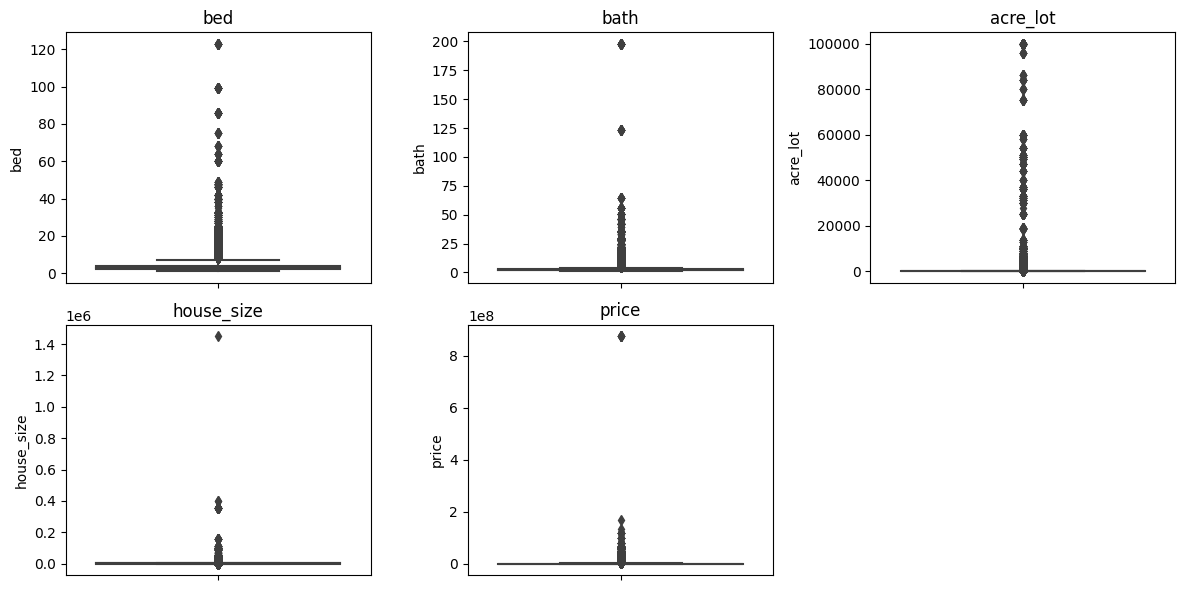

In [14]:
# Using boxplots to identify the outliers

numeric_columns=['bed','bath','acre_lot', 'house_size','price']
outlier_threshold=3

plt.figure(figsize=(12,6))
for i, col in enumerate(numeric_columns):
    plt.subplot(2,3, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

In [15]:
# Define the imputation method for each variable
imputation_methods = {
    'bed': 'median',
    'bath': 'median',
    'acre_lot': 'median',
    'house_size': 'median',
    'price': 'mean'
}

# Impute outliers 
for col in numeric_columns:
    if imputation_methods[col]=='mean':
        df[col]=np.where(
        np.abs(df[col]-np.mean(df[col]))>outlier_threshold*np.std(df[col]),
        np.mean(df[col]),
        df[col]
        )
    elif imputation_methods[col]=='median':
        df[col]=np.where(
        np.abs(df[col]-np.median(df[col]))>outlier_threshold*np.std(df[col]),
        np.median(df[col]),
        df[col]
        )
    else:
        pass

In [16]:
df.isnull().sum()

status                 0
bed                    0
bath                   0
acre_lot               0
city                   0
state                  0
zip_code               0
house_size             0
prev_sold_date    685790
price                 73
dtype: int64

# Exploratory Data Analysis 

# Distribution of Price

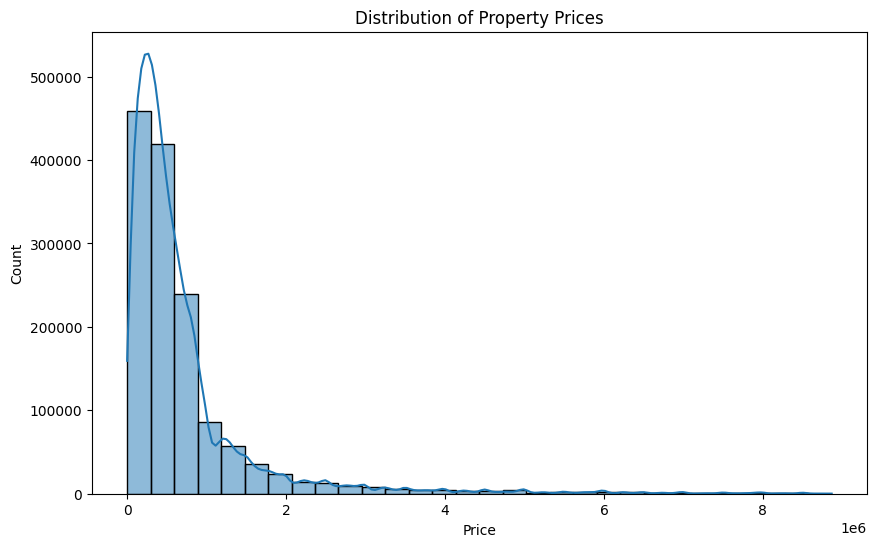

In [17]:
# Distribution of Price
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Distribution of 'bed' and 'bath'

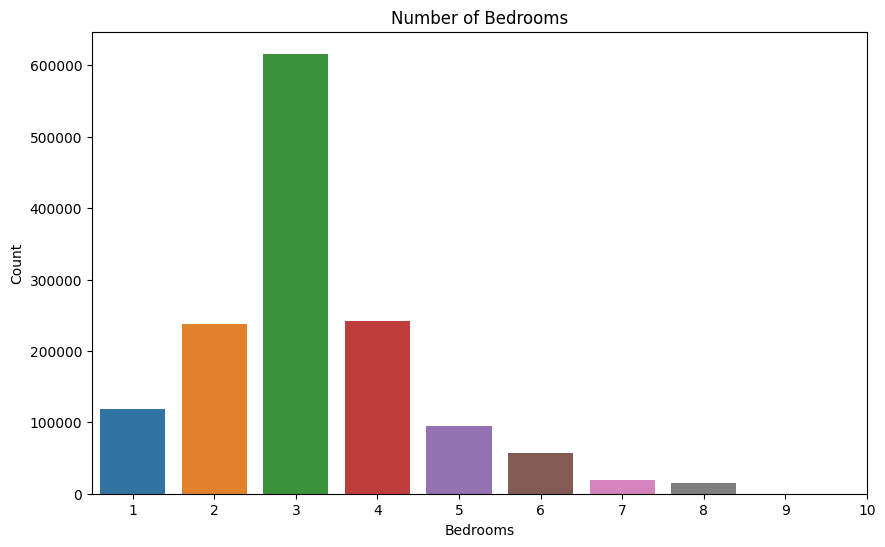

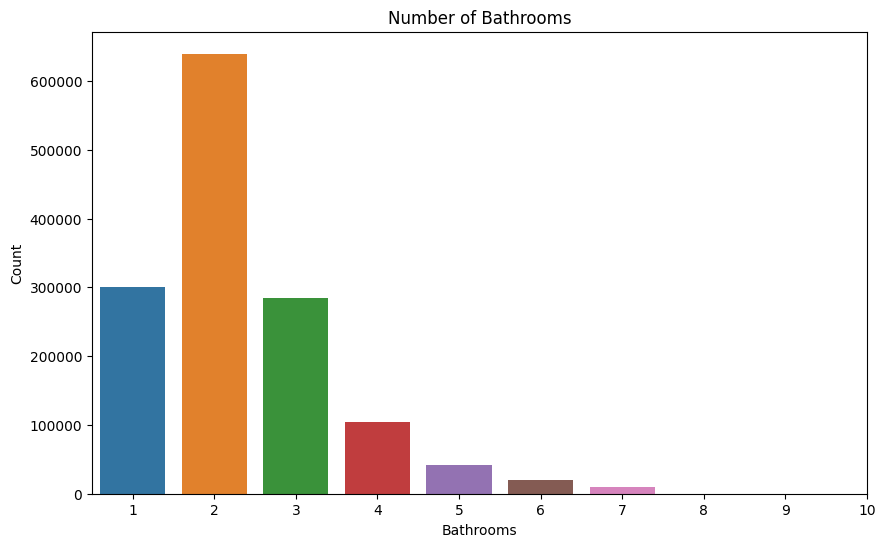

In [18]:
# Show 'bed' values from 1.0 to 10.0
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='bed')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(10), labels=np.arange(1,11))
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='bath')
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(10), labels=np.arange(1,11))
plt.show()

# Distribution of 'acre_lot'

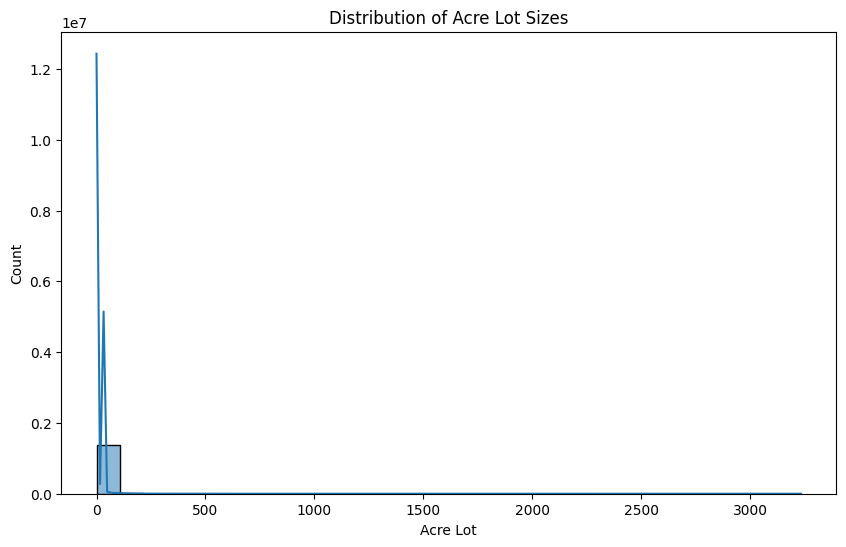

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df['acre_lot'], bins=30, kde=True)
plt.title('Distribution of Acre Lot Sizes')
plt.xlabel('Acre Lot')
plt.ylabel('Count')
plt.show()

# Top Cities with Highest Number of Real Estate Listings

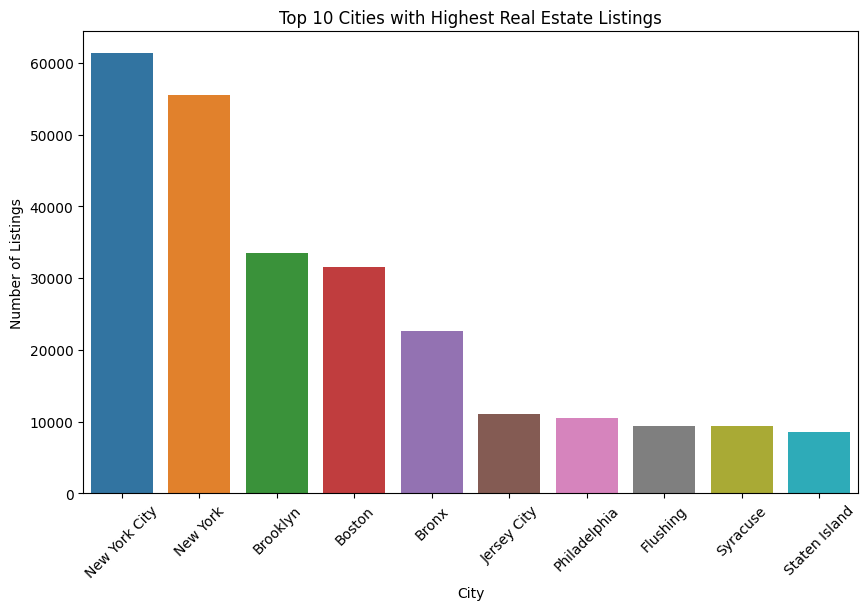

In [20]:
top_cities = df['city'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Cities with Highest Real Estate Listings')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

# Top States With Highest Number of Real Estate Listings 

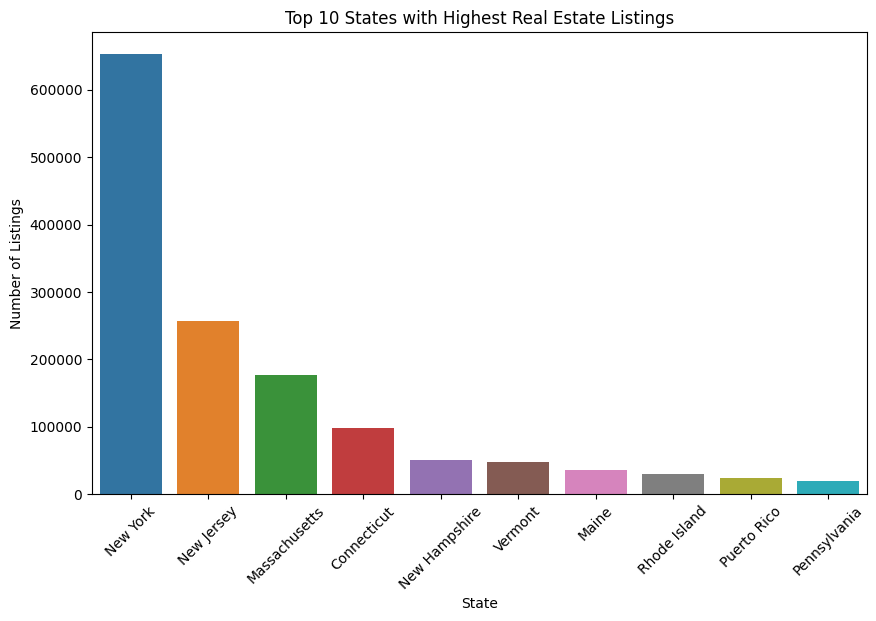

In [21]:
top_states = df['state'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top 10 States with Highest Real Estate Listings')
plt.xlabel('State')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

# Distribution of 'house_size'

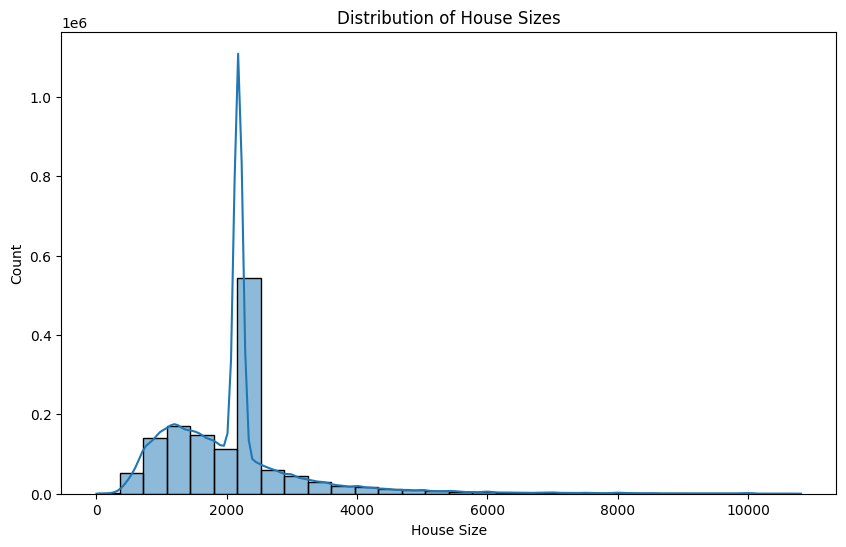

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(df['house_size'], bins=30, kde=True)
plt.title('Distribution of House Sizes')
plt.xlabel('House Size')
plt.ylabel('Count')
plt.show()

# Trends in Previous Sales Dates

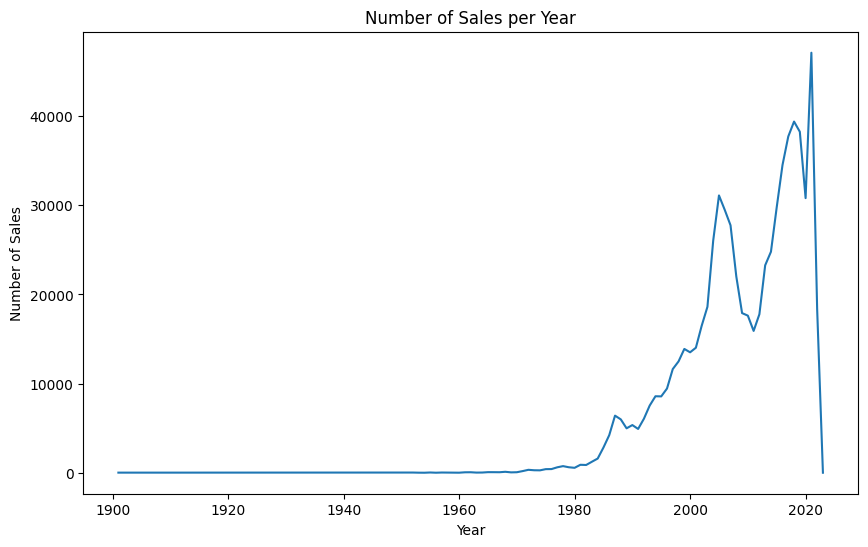

In [23]:
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'])
df['year_sold'] = df['prev_sold_date'].dt.year
yearly_sales = df['year_sold'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Number of Sales per Year')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.show()

# Market Analysis 

# Relationship between 'price' and other variables 

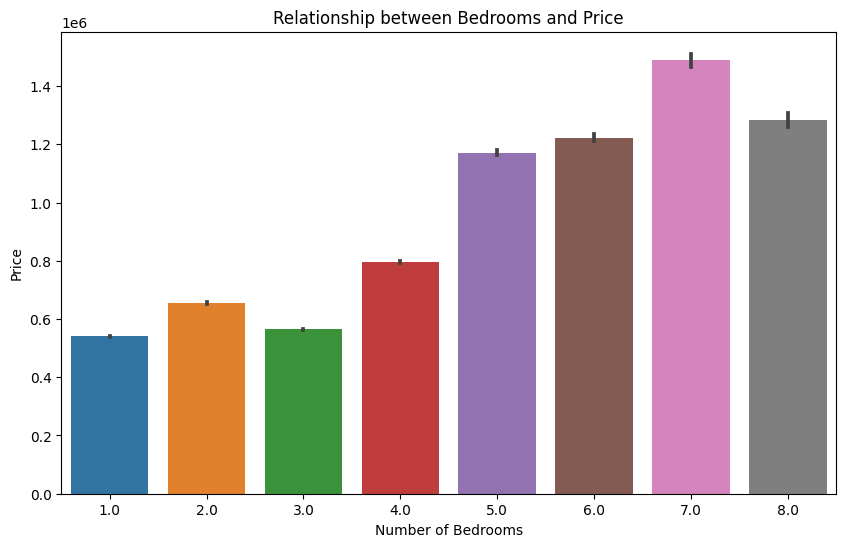

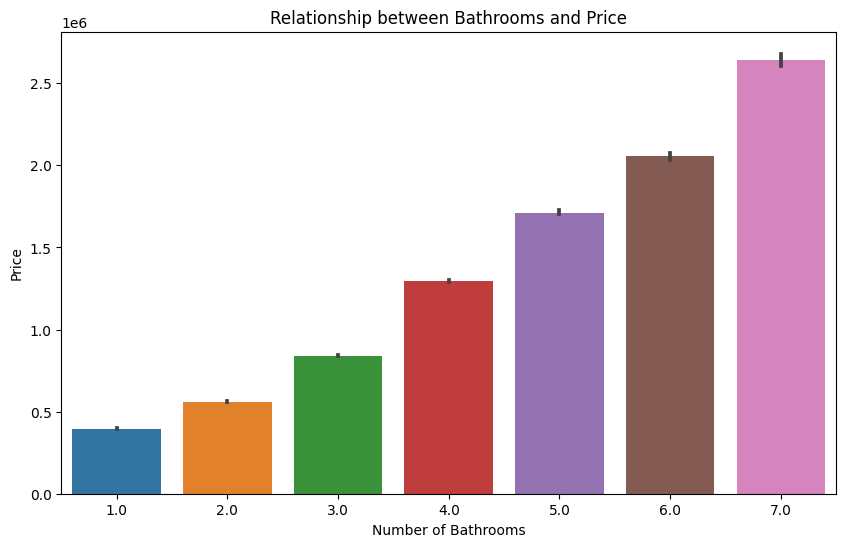

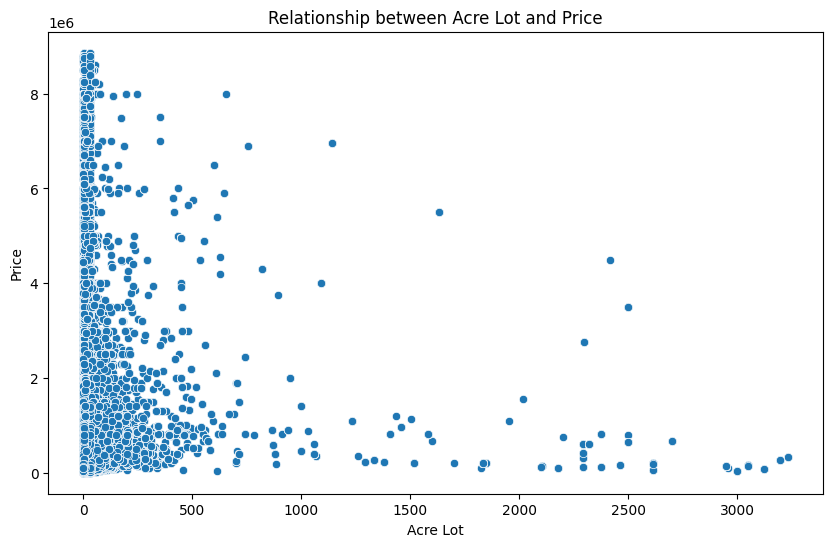

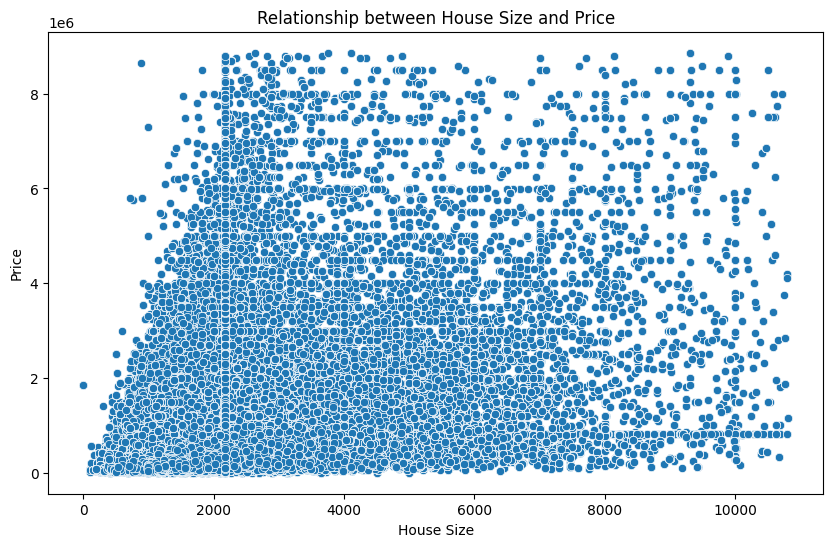

In [24]:
# Number of rooms and price 
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='bed', y='price')
plt.title('Relationship between Bedrooms and Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Number of bedrooms and price
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='bath', y='price')
plt.title('Relationship between Bathrooms and Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

# Acre lot and price 
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='acre_lot', y='price')
plt.title('Relationship between Acre Lot and Price')
plt.xlabel('Acre Lot')
plt.ylabel('Price')
plt.show()

# House size and price
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='house_size', y='price')
plt.title('Relationship between House Size and Price')
plt.xlabel('House Size')
plt.ylabel('Price')
plt.show()

# Relationship Between 'price' and 'zipcode'

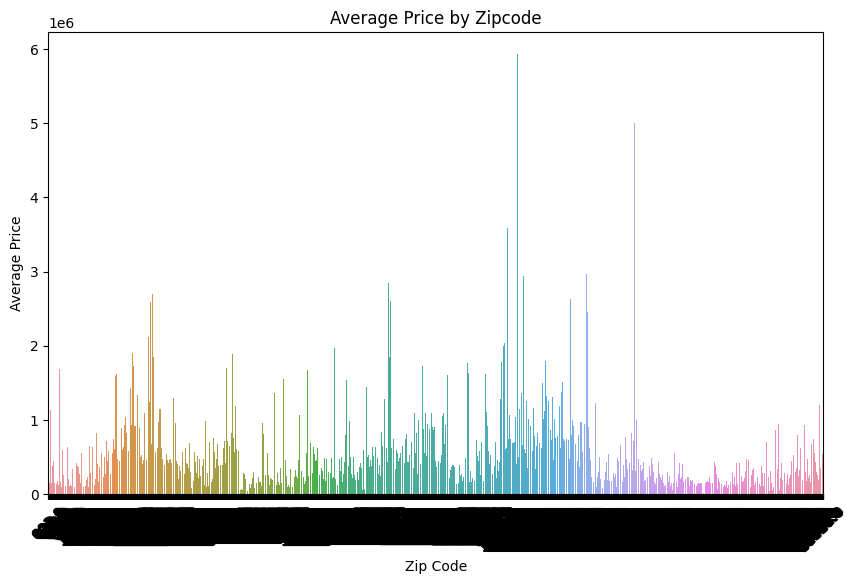

In [25]:
avg_price_by_zip = df.groupby('zip_code')['price'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=avg_price_by_zip, x='zip_code', y='price')
plt.title('Average Price by Zipcode')
plt.xlabel('Zip Code')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Highest average price and zip code
max_avg_price = avg_price_by_zip['price'].max()
max_avg_price_zip = avg_price_by_zip.loc[avg_price_by_zip['price']==max_avg_price, 'zip_code'].values[0]

print("The highest average price is:", max_avg_price)
print("Zip code with the highest average price:", max_avg_price_zip)

The highest average price is: 5932000.0
Zip code with the highest average price: 10518.0
